In [0]:
# First we must import pandas, a data analysis module for python
# See: https://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd

In [28]:
# "Import" data into pandas
# See: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
citations = pd.read_csv('https://raw.githubusercontent.com/uohack/data-literacy/master/04-advanced-analysis/citations.csv')

# Get snapshot of the data
citations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31086 entries, 0 to 31085
Data columns (total 5 columns):
ISSUE DATE                31086 non-null object
ISSUE TIME                31050 non-null object
FINE AMOUNT               31086 non-null object
TICKET LOCATION STREET    31086 non-null object
VIOLATION DESCRIPTION     31086 non-null object
dtypes: object(5)
memory usage: 1.2+ MB


In [29]:
# Show a quick description of the data
# More info on describe(): http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
citations.describe()

,ISSUE DATE,ISSUE TIME,FINE AMOUNT,TICKET LOCATION STREET,VIOLATION DESCRIPTION
count,31086,31050,31086,31086,31086
unique,626,1137,15,429,47
top,10/3/2016,10:34,$20.00,UNIVERSITY ST METERS,OVERTIME STREET MTR
freq,178,113,12355,5933,7415


In [30]:
# Convert column from plain text to datetime
# See: https://stackoverflow.com/a/17978188
citations['new datetime'] = pd.to_datetime(citations['ISSUE DATE'] + ' ' + citations['ISSUE TIME'])
# Check column type now
citations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31086 entries, 0 to 31085
Data columns (total 6 columns):
ISSUE DATE                31086 non-null object
ISSUE TIME                31050 non-null object
FINE AMOUNT               31086 non-null object
TICKET LOCATION STREET    31086 non-null object
VIOLATION DESCRIPTION     31086 non-null object
new datetime              31050 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.4+ MB


In [31]:
# Check max and min now
citations['new datetime'].describe()

count                   31050
unique                  29576
top       2015-03-10 13:49:00
freq                        3
first     2015-01-04 02:08:00
last      2017-03-13 17:22:00
Name: new datetime, dtype: object

In [32]:
# Remove dates before outside of FY 2015-16
# See: https://stackoverflow.com/a/27360130
# Example: df = df.drop(df[<some boolean condition>].index)
citations = citations.drop(citations[citations['new datetime'] < '7-1-2015 00:00:00'].index).drop(citations[citations['new datetime'] > '6-30-2016 23:59:59'].index)
# Check max and min now
citations['new datetime'].describe()

count                   14032
unique                  13394
top       2015-11-06 15:48:00
freq                        3
first     2015-07-01 07:31:00
last      2016-06-30 16:59:00
Name: new datetime, dtype: object

In [33]:
# Value counts are the best!
# See: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
citations['TICKET LOCATION STREET'].value_counts()

UNIVERSITY ST METERS         2673
LOT 16A - FAC/STAFF LOT      1302
15TH AVE                      883
LOT 29A - EMU VIS LOT         578
LOT 12A - ONYX-LAWRENCE       560
13TH AVE METERS               558
LOT 15 - JAQUA                480
LOT 17 - HEDCO                477
LOT 56 - MILLRACE             403
LOT 42 - 12TH W OF KIN        377
LOT 18 - EDUCATION            266
LOT 44 - GRAD VILLAGE         248
LOT 36A - CARSON              244
SPENCER VIEW APTS             223
LOT 33 - BEAN EAST            218
LOT 55 - MOSS ST              216
LOT 50 - BARNHART             214
LOT 37 - HAMILTON E           214
LOT 34E - GLOBAL SCHOLARS     201
LOT 46 - MOSS CONNECT         191
LOT 19 - HEDCO/CSB            168
LOT 13 - 13TH BEECH-UNIV      163
15TH AVE METERS               137
LOT 6A - 11TH/KINCAID         135
LOT 30 - MCCT                 126
LOT 58 - 1715 FRANKLIN        126
LOT 99 - COL. GARAGE          108
LOT 52 - UOPD EAST             95
LOT 3A - AAA AREA              89
LOT 36B - STU 

In [34]:
# And get some data just to be sure
citations['TICKET LOCATION STREET'].value_counts().describe()

count     292.000000
mean       48.178082
std       198.066363
min         1.000000
25%         1.000000
50%         2.000000
75%        12.250000
max      2673.000000
Name: TICKET LOCATION STREET, dtype: float64

In [0]:
# Create new column for day of week
# See: https://stackoverflow.com/a/28009526
# Example: df['weekday'] = df['Timestamp'].dt.dayofweek
citations['new dayofweek'] = citations['new datetime'].dt.dayofweek 

In [0]:
# See counts for day of week
# See: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
# See: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.dayofweek.html
df = citations.groupby(citations['new dayofweek']).count()

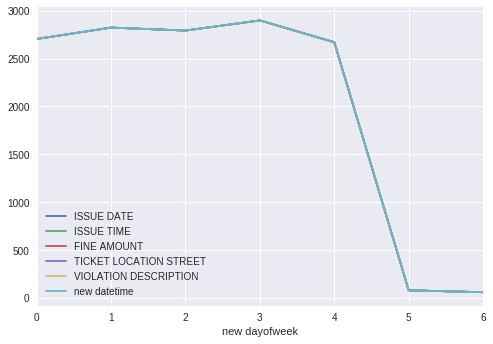

In [71]:
df.plot()

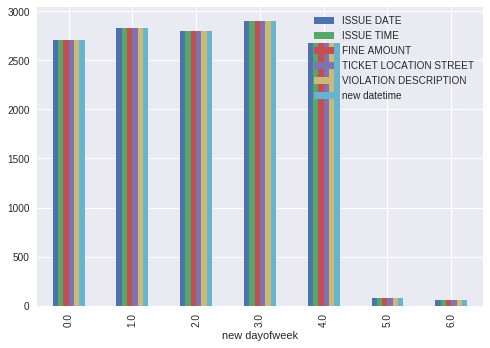

In [72]:
df.plot(kind='bar')

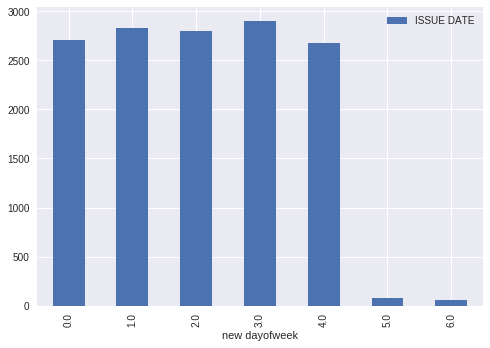

In [73]:
df.plot(y='ISSUE DATE', kind='bar')